In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim #Hacer animaciones
from numpy import linalg as linalg

In [2]:
#Clase partícula
class Particle():
    
    #Constructor de la clase
    def __init__(self, r0, v0, a0, t, m, f0, radius, Id):
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.f = f0
        self.fVector = np.zeros((len(t), len(f0)))
        
       
    #Llenando las posiciones
    def SetPosition(self,i,r):
        self.rVector[i] = r
    
    #Llenando las velocidades
    def SetVelocity(self,i,v):
        self.vVector[i] = v
    
    #Llenando las aceleraciones
    def SetAceleration(self,i,a):
        self.aVector[i] = a
        
    def setFuerza(self, i, f):
        self.fVector[i] = f
    
    #Método
    def Evolution(self,i):
        
        #Setteando las poisiciones y velocidades
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetAceleration(i,self.a)
        self.setFuerza(i, self.f)
        
        #Método de Euler
        self.r = self.r + self.dt * self.v
        self.v = self.v + self.dt * self.a
      
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def GetFuerza(self):
        return self.fVector
    
    #¿Qué pasa si choca?
    def CheckWallLimits(self,limits,dim=2):
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]*0.8
                #Pérdida de energía 
                
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]*0.8
                #Pérdida de energía
        
                
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
    def fuerzaParticulas(self, other,limits, dim):
        R1 = self.radius
        R2 = other.radius
        K = 4
        Vec = self.r - other.r
        normalVec = Vec/linalg.norm(Vec)
        
        for i in range(dim):
            if (np.hypot(*(Vec)) <= (R1 + R2)):
                    self.f[i] = (K*((np.abs(linalg.norm(Vec))**3)))*normalVec[i]
                    other.f[i] = (K*((np.abs(linalg.norm(Vec))**3)))*normalVec[i]
                    
                    self.a[i] = self.f[i]/self.m
                    other.a[i] = other.f[i]/other.m
                    
                    self.v[i]  = -(self.v[i] + (self.a[i]*self.dt))
                    other.v[i] = -(other.v[i] + (other.a[i]*other.dt))
                    
            else: 
                self.f[i] = 0
                self.a[i] = 0
                
                other.f[i] = 0
                other.a[i] = 0
                
             
        self.CheckWallLimits(limits,dim=2)
        other.CheckWallLimits(limits,dim=2)
        
        self.SetAceleration(i,self.a)
        self.setFuerza(i, self.f)
        
        other.SetAceleration(i,other.a)
        other.setFuerza(i, other.f)

In [3]:
def GetParticles(NParticles, Limits, Velo, Dim = 2, dt=0.01):
    
    Particles_ = [ ]
    
    for i in range(NParticles):
        
        r0 = np.random.uniform(-Limits + 1.0, Limits-1.0, size = Dim) #Distribución aleatoria con una tolerancia.
        v0 = np.random.uniform(-Velo, Velo, size = Dim) #Distribución aleatoria con una tolerancia.
        a0 = np.zeros(Dim)
        f0 = np.zeros(Dim)
   
        p = Particle(r0, v0, a0, t, 1.0, f0, 1.0, i)

        Particles_.append(p)
    
    return Particles_

In [4]:
def RunSimulation(t, NParticles, Velo):
    
    Particles = GetParticles(NParticles, Limits[0], Velo = Velo, dt = dt)
    
    for it in tqdm(range(len(t))): #Evolución temporal que define la simulación en un tiempo t
                    
        for i in range(len(Particles)):
        
            for j in range(len(Particles)):
                
                if (i!=j):
                    Particles[i].fuerzaParticulas(Particles[j], Limits, 2)
                    
            Particles[i].Evolution(it)
            Particles[i].CheckWallLimits(Limits)
            
    return Particles

In [5]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [6]:
#Definición de los atributos

dt = 0.01 #Paso temporal
tmax= 30 #Tiempo máximo
t = np.arange(0, tmax+dt, dt) #Array de tiempos

Limits = np.array([5, 5]) #Límites de la caja

#Creamos las partículas
Particles = RunSimulation(t, 3, Velo = 10)

redt = ReduceTime(t,10) #Reducción del tiempo

100%|████████████████████████████████████████████████████████████████████████████| 3001/3001 [00:00<00:00, 3095.44it/s]


<IPython.core.display.Javascript object>


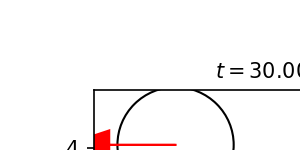

In [7]:
redt = ReduceTime(t,10)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ segundos de simulación$' %(redt[i]), fontsize=10)
    
    for p in Particles:
        x = p.GetPositionVector()[i,0]
        y = p.GetPositionVector()[i,1]
        
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        plot = ax.add_patch(circle)
        plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)